<a href="https://colab.research.google.com/github/liz-robson/data-analysis-with-python/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [6]:
df = pd.read_csv('epa-sea-level.csv')

print(df.head)

<bound method NDFrame.head of      Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0             

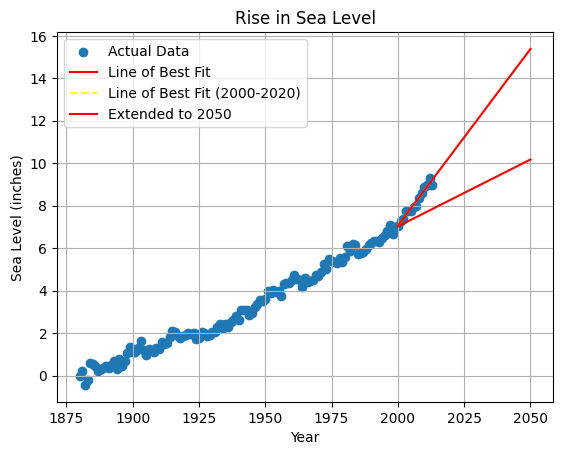

In [21]:
# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

def draw_plot(data) :

  df = data.copy()

  # Create scatter plot
  plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], label='Actual Data')

  # Calculate the slope and y-intercept using linregress
  slope, intercept,_,_,_ = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

  # Plot the line of best fit
  extended_years = np.array([2000, 2050])  # Extend the line to the year 2050
  line_sea_levels = slope * extended_years + intercept
  plt.plot(extended_years, line_sea_levels, color='red', label='Line of Best Fit')

  # Filter data from 2000 to the most recent year
  years = df['Year']
  sea_levels = df['CSIRO Adjusted Sea Level']
  recent_years = years[years >= 2000]
  recent_sea_levels = sea_levels[years >= 2000]

  # Perform linear regression on recent data
  slope_recent, intercept_recent, _, _, _ = linregress(recent_years, recent_sea_levels)

  # Plot line of best fit for recent data
  plt.plot(recent_years, slope_recent * recent_years + intercept_recent, color='yellow', linestyle='--', label='Line of Best Fit (2000-2020)')

  # Extend line to predict sea level rise in 2050
  extended_sea_levels = slope_recent * extended_years + intercept_recent
  plt.plot(extended_years, extended_sea_levels, color='red', label='Extended to 2050')

  # Add labels and title
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')
  plt.title('Rise in Sea Level')

  # Add legend
  plt.legend()

  # Display the plot
  plt.grid(True)
  plt.show()

draw_plot(df)